## Project: Credit Score Prediction

### Team Members: Niramay Kelkar (001080777), Nityashree Vijaykumar (001817368), Shravani Vaze (001375943)

#### The link to dataset is https://www.kaggle.com/prasy46/credit-score-prediction. The goal here is to perform regression and predict the credit scores based on the given parameters. We need to deal with missing values, compare different models and perform hyperparameter tuning and select the best model for regression based off on metric used root mean squared error

### Step 1 : Module imports

In [1]:
# Import the required modules 

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib inline

In [2]:
# Check for the working directory 
%pwd

'/Users/niramaykelkar/Desktop/DS/Project'

In [3]:
''' Set the path variable to the directory/folder where the dataset and notebook is located 
in order to avoid typing in long path names every time '''

path = '/Users/niramaykelkar/Desktop/DS/Project'

In [4]:
!ls

Credit Score Prediction .ipynb CreditScore_train.csv
CreditScore_test.csv


### Step 2 : Reading the data into the notebook

In [5]:
#Reading in the training dataset

df_train = pd.read_csv(f'{path}/CreditScore_train.csv')
print(df_train.shape)
df_train.head(5)

(80000, 305)


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


In [6]:
# Reading in the test set

df_test = pd.read_csv(f'{path}/CreditScore_test.csv')
print(df_test.shape)
df_test.head(5)

(20000, 305)


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1566464,21.0,21.0,21.0,44.0,1,0,0,4,0,...,0,NaN,0,0,1,1,5.0,0,NaN,406
1,925102,108.0,2.0,27.0,156.0,0,2,3,3,1,...,13090,0.593,1,1,1,0,1.0,0,NaN,679
2,1273974,218.0,64.0,107.0,218.0,0,0,0,0,0,...,13689,1.014,1,1,1,0,1.0,13689,1.014,750
3,1456723,NaN,NaN,NaN,146.0,1,0,0,1,1,...,0,NaN,1,1,1,0,NaN,0,NaN,515
4,798267,0.0,0.0,0.0,230.0,1,2,4,0,2,...,0,NaN,1,1,1,0,NaN,0,NaN,589


In [7]:
# Check for datatypes for all the columns so that we can scale the data later

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 305 entries, x001 to y
dtypes: float64(41), int64(264)
memory usage: 186.2 MB


### Step 3 : Data imputation

In [8]:
# Check for N/A or NaN values in each column

df_train.isna().sum()

x001        0
x002    17185
x003    17185
x004    17181
x005     4867
        ...  
x301        0
x302    58471
x303        0
x304    65456
y           0
Length: 305, dtype: int64

In [9]:
# Checking for null values in each column

df_train.isnull().any()

x001    False
x002     True
x003     True
x004     True
x005     True
        ...  
x301    False
x302     True
x303    False
x304     True
y       False
Length: 305, dtype: bool

In [10]:
# Checking for the descriptive statistics

df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
x001,80000.0,1.218319e+06,273014.593366,517.0,974552.7500,1.235833e+06,1.445546e+06,1.677197e+06
x002,62815.0,1.256073e+02,115.662548,0.0,32.0000,1.000000e+02,1.800000e+02,7.180000e+02
x003,62815.0,2.558252e+01,49.067905,0.0,3.0000,8.000000e+00,2.400000e+01,7.040000e+02
x004,62819.0,6.537965e+01,63.528938,0.0,19.0000,4.800000e+01,9.200000e+01,7.040000e+02
x005,75133.0,1.780436e+02,124.431075,0.0,87.0000,1.500000e+02,2.460000e+02,7.900000e+02
...,...,...,...,...,...,...,...,...
x301,80000.0,1.057625e-01,0.307535,0.0,0.0000,0.000000e+00,0.000000e+00,1.000000e+00
x302,21529.0,2.941196e+00,2.128464,1.0,1.0000,1.000000e+00,5.000000e+00,9.000000e+00
x303,80000.0,6.443204e+03,24319.031452,0.0,0.0000,0.000000e+00,0.000000e+00,7.855370e+05
x304,14544.0,1.037589e+00,0.328551,0.0,0.9758,1.048700e+00,1.185225e+00,5.156900e+00


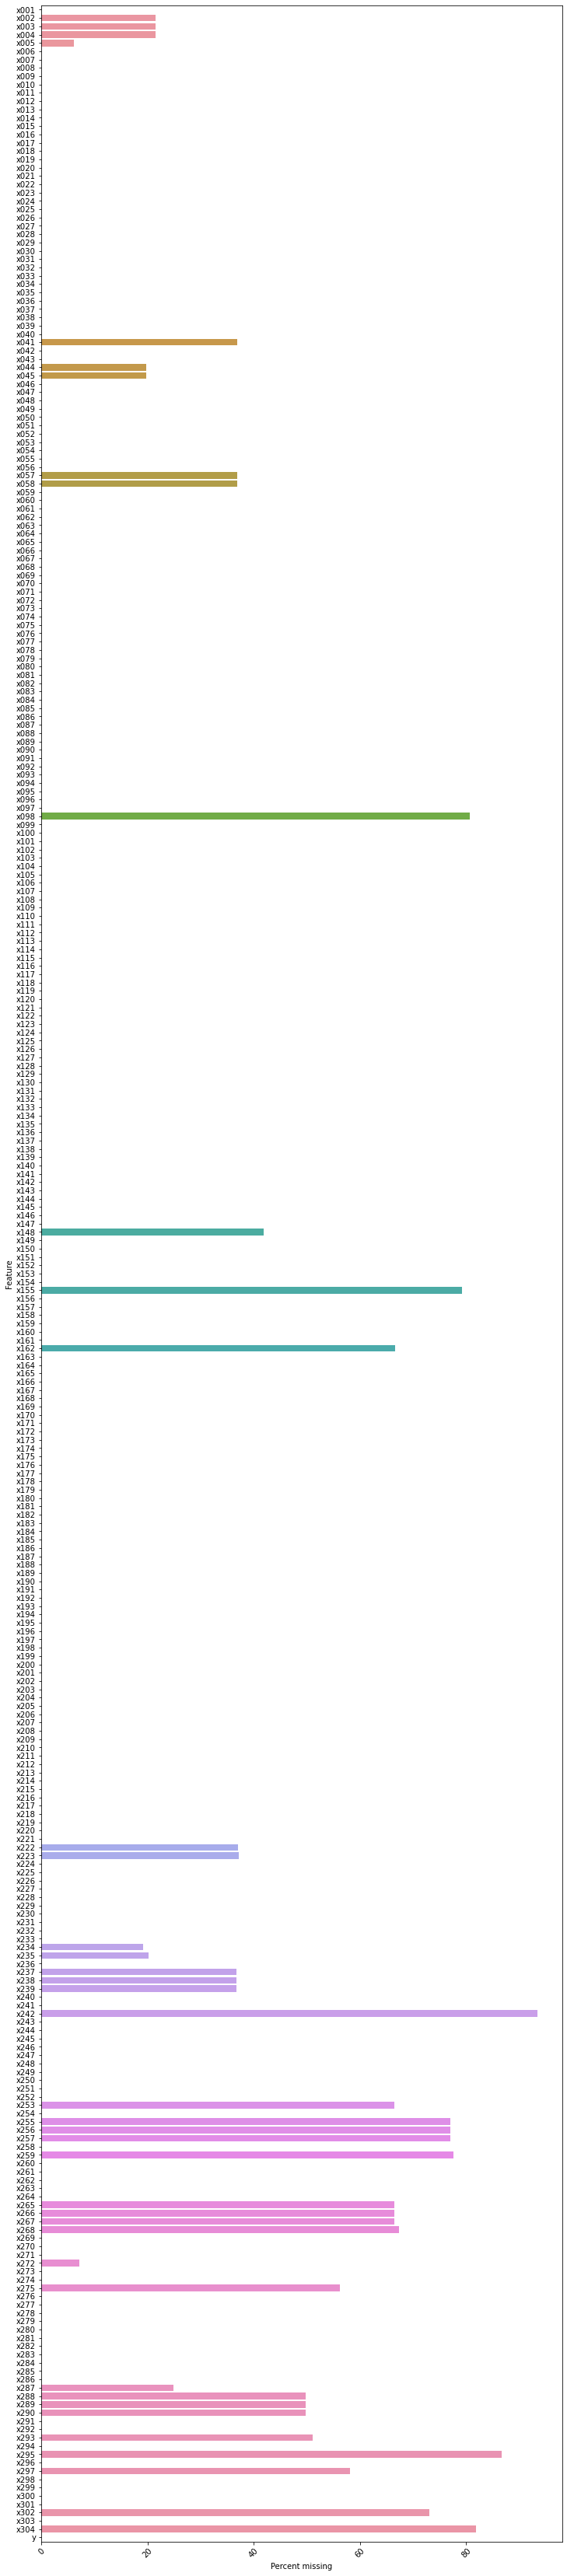

In [11]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = df_train.isnull().sum()/len(df_train)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (12,60))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

##### Here we can see that there are a few columns in the dataset with more than 60% missing data so we wil discard them as it makes no sense to impute values in those columns. But instead we will deal with columns with less than 60% missing values.

In [13]:
''' Determining the columns with more than 60% missing values
Taking them in a variable to be discarded later'''

total = df_train.count() 
sumcol = df_train.isnull().sum() 
count = df_train.isnull().count()

per = (df_train.isnull().sum()/count*100).sort_values(ascending=False)
missing_data = pd.concat([total, per, sumcol, count], axis=1, keys=['Total', 'Percent', 'Sumcol', 'Count'])
miss_perc = missing_data.sort_values(['Percent'], axis=0, ascending=False)
m_per = miss_perc[miss_perc.Percent > 60]
print(m_per)

      Total   Percent  Sumcol  Count
x242   5290  93.38750   74710  80000
x295  10723  86.59625   69277  80000
x304  14544  81.82000   65456  80000
x098  15463  80.67125   64537  80000
x155  16687  79.14125   63313  80000
x259  17965  77.54375   62035  80000
x255  18386  77.01750   61614  80000
x256  18386  77.01750   61614  80000
x257  18386  77.01750   61614  80000
x302  21529  73.08875   58471  80000
x268  26137  67.32875   53863  80000
x162  26760  66.55000   53240  80000
x266  26779  66.52625   53221  80000
x267  26779  66.52625   53221  80000
x265  26779  66.52625   53221  80000
x253  26885  66.39375   53115  80000


In [14]:
# Dropping the columns which have more than 60% missing values

drop_cols = m_per.index

filt_df=df_train.drop(columns=drop_cols,axis=1)

print(filt_df.shape)

(80000, 289)


### Step 4 : Plotting the graphs

##### Now lets plot the correlation matrix to know how different columns are related to each other

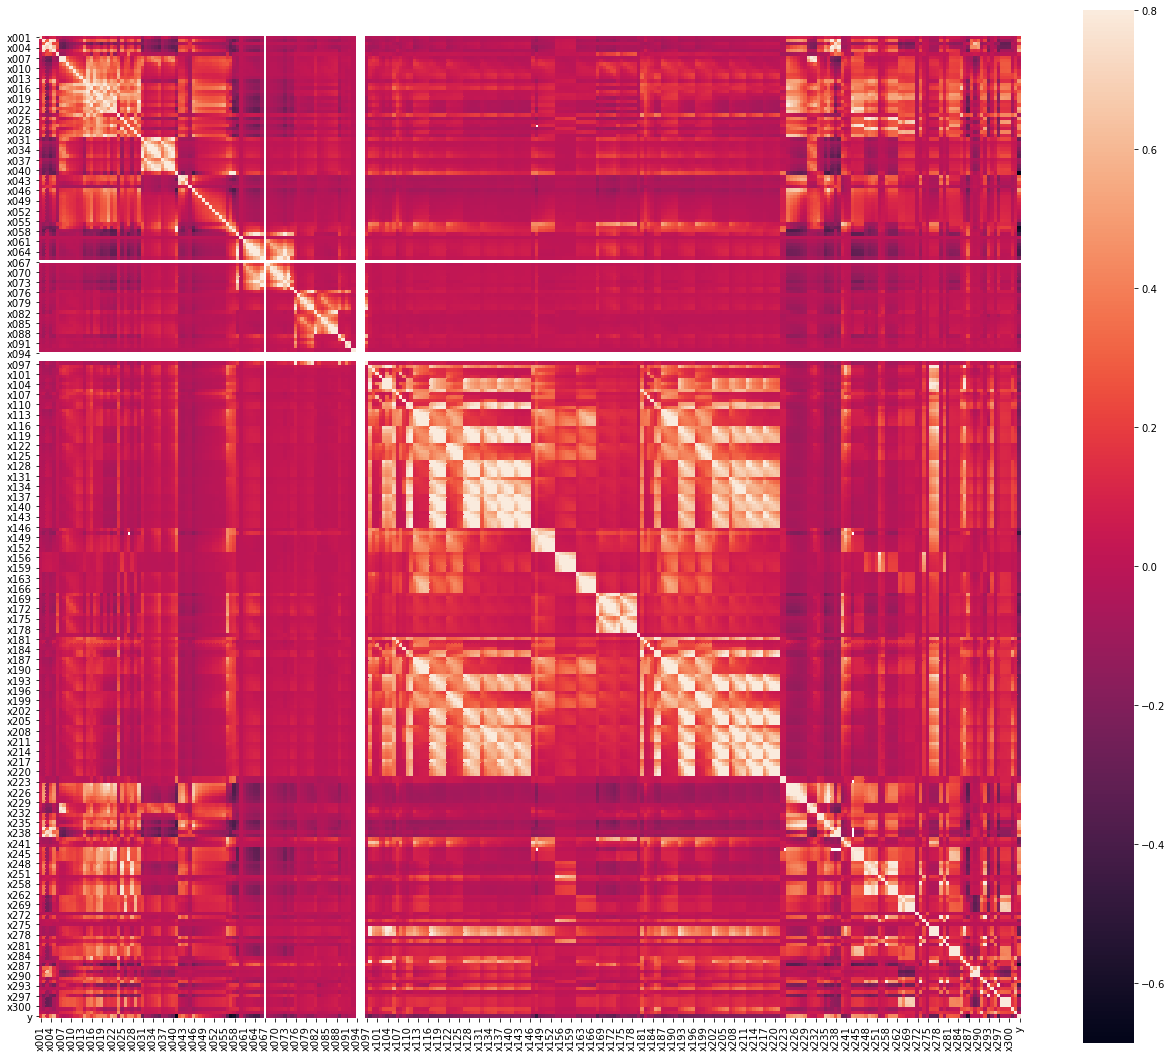

In [15]:
corrmat = filt_df.corr()
plt.figure(figsize=(22,19))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

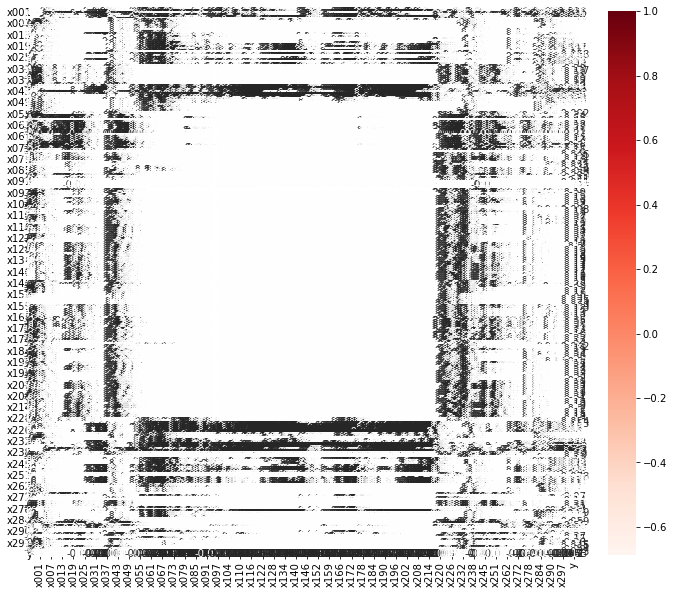

In [16]:
''' Now using the Pearson Correlation we will see whether statistically significant relationship exist 
between the continuous variables'''

plt.figure(figsize=(12,10))
cor = filt_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
''' Now we will check the columns who have correlation co-efficient less than 0.3 as they state weak correlation
Will take them in a variable and discard them later '''

cor_target = abs(filt_df.corr()["y"])
relevant_features = cor_target[cor_target<0.3]
relevant_features

x001    0.163198
x003    0.121311
x006    0.092552
x007    0.008623
x008    0.022150
          ...   
x298    0.044734
x299    0.045160
x300    0.041225
x301    0.222584
x303    0.033289
Name: y, Length: 225, dtype: float64

In [18]:
# Dropping the columns having corelation > 0.3 to get the independent continuous values to make predictions

lst_key=[]
null_key=[]

for i,j in relevant_features.items():
    lst_key.append(i)
    
df = filt_df.drop(columns=lst_key,axis=1)
print(df.shape)

(80000, 64)


In [23]:
# Now on the remaining columns we will impute the data. So we will make a list of columns to be imputed

cols = df.isnull().any()==True
cols

x002     True
x004     True
x005     True
x014    False
x015    False
        ...  
x278    False
x287     True
x293     True
x297     True
y       False
Length: 64, dtype: bool

In [24]:
# Determining the columns to impute values 

for i,j in cols.items():
    if j==True:
        null_key.append(i)
print(null_key)

['x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297']


##### Now with the columns listed who needs to be imputed we will impute the values in those columns taking the mean values

In [25]:
# Using fillna to impute the missing data by replacing values with backfill method

for i in null_key:
    df[i].fillna(method='backfill',inplace=True)
    
df.shape  

(80000, 64)

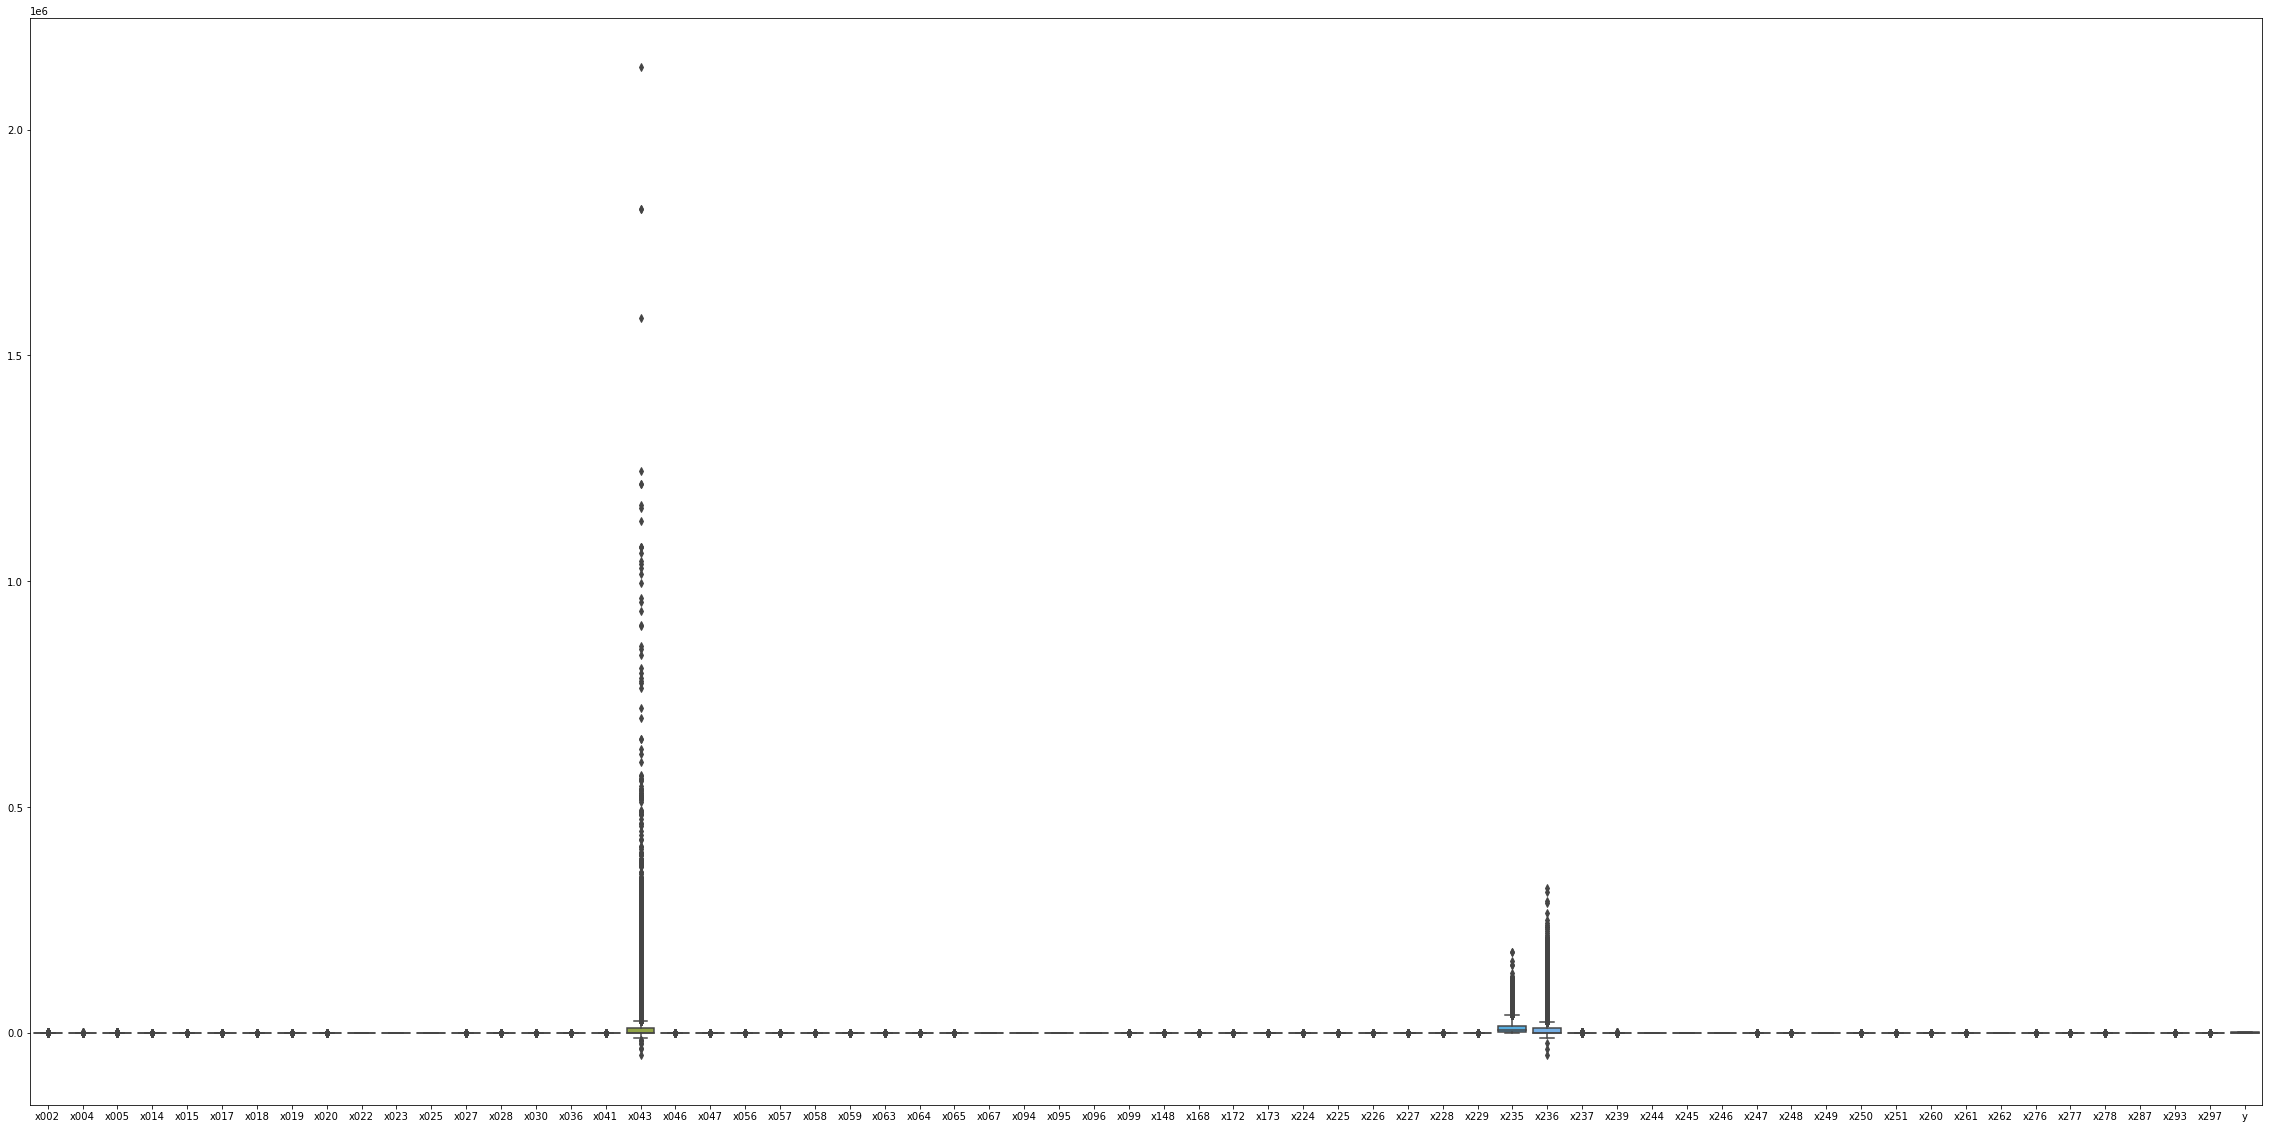

In [26]:
# Plotting the boxplot to check the distribution of the values so that we can scale them accordingly

plt.figure(figsize = (40,20))
sns.boxplot(data = df)

### Step 5 : Scaling the data

In [33]:
# Creating X & Y for train

X = df.drop("y", axis=1)
Y = df["y"]
print(X.shape)
print(Y.shape)

(80000, 63)
(80000,)


In [34]:
''' We will use p-value to check the significance of features on the data and discard the columns
with p > 0.05 as they are not statistically significant '''

import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     4580.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:16:30   Log-Likelihood:            -4.3685e+05
No. Observations:               80000   AIC:                         8.738e+05
Df Residuals:                   79941   BIC:                         8.744e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        578.8015      1.020    567.562      0.0

In [35]:
disc_cols = ['x015', 'x020', 'x025', 'x028', 'x043', 'x064', 'x065', 'x173', 'x226', 'x227', 'x228', 'x246', 'x250', 'x261', 'x262', 'x277']

f_df = df.drop(columns=disc_cols,axis=1)
print(f_df.shape)

(80000, 48)


In [37]:
# Creating X & Y for train after feature selection

X1 = f_df.drop("y", axis=1)
Y1 = f_df["y"]
print(X1.shape)
print(Y1.shape)

(80000, 47)
(80000,)


In [38]:
# Scaling the data using MixMaxScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X1)
scaled_X = scaler.transform(X1)
print(scaled_X)

[[0.59331476 0.18181818 0.53924051 ... 0.         0.04574481 0.17939428]
 [0.22284123 0.09090909 0.20253165 ... 0.         0.04574481 0.17939428]
 [0.2270195  0.14772727 0.30253165 ... 1.         0.05532639 0.21696967]
 ...
 [0.18802228 0.07102273 0.17088608 ... 0.         0.05425029 0.21274963]
 [0.18384401 0.05823864 0.46329114 ... 0.125      0.04081    0.16004177]
 [0.13091922 0.03835227 0.13797468 ... 0.125      0.04885896 0.21922888]]


In [39]:
# Splitting the data into training and validation sets

X_train, X_valid, Y_train, Y_valid = train_test_split(scaled_X, Y1, test_size = 0.25)

print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(60000, 47)
(20000, 47)
(60000,)
(20000,)


### Step 6 : Comparing the models 

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Choosing parameters to tune 
folds   = 20
metric  = "neg_mean_absolute_error"


# Making a dictionary of different Regression models to select the best between them
models = {}
models["Linear"]        = LinearRegression()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["AdaBoost"] = AdaBoostRegressor()


# Checking the performance of different models using cross_val_score
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds, random_state = None)
	results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))


Linear: -44.248, 0.664
DecisionTree: -37.536, 0.573
KNN: -41.888, 0.764
RandomForest: -25.855, 0.373
GradientBoost: -29.396, 0.413
AdaBoost: -43.791, 0.516


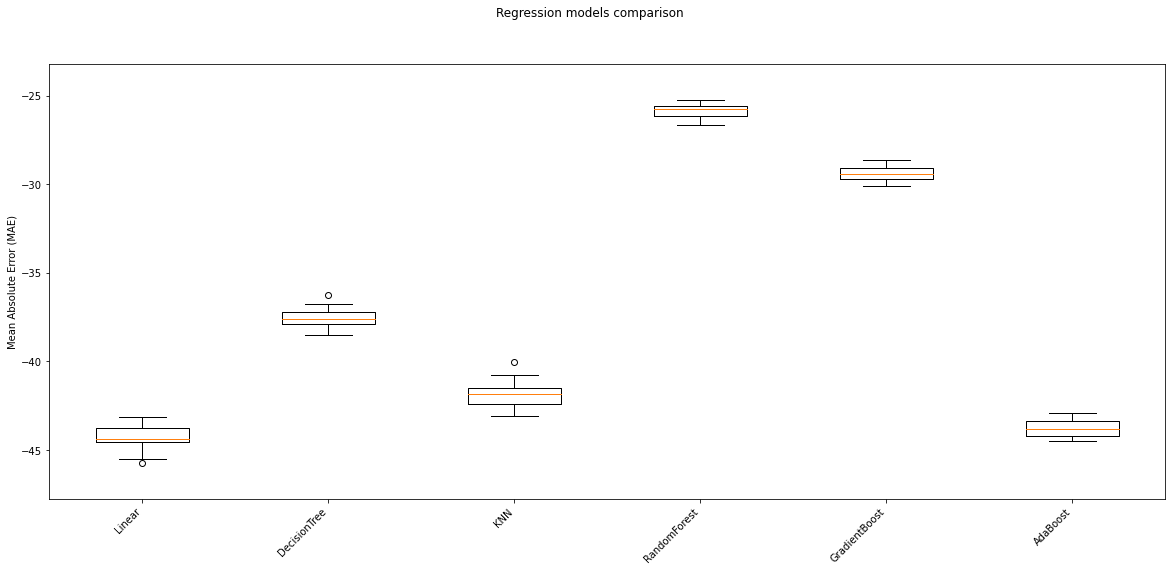

In [41]:
# Box-whisker plot to compare regression models
figure = plt.figure(figsize = (20,8))

figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Absolute Error (MAE)")
plt.margins(0.05, 0.1)

##### Here we can see that RandomForest and GradientBoosting provides better performance so we will further improve them and decide between them by tuning different hyperparameters

### Step 7 : Hyperparameter Tuning 

##### RandomForestRegressor

In [42]:
# Lets start with RandomForestRegressor and tune the hyperparameters

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [20, 50, 60, 80, 90, 100, 120, 150, 200], 'max_features': ["auto", "sqrt", "log2"]}
rfr = RandomForestRegressor(random_state = 1)
reg = GridSearchCV(estimator = rfr, param_grid = parameters)
reg.fit(X_train, Y_train)

# Displaying the best params 
reg.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

In [43]:
# Selecting the best params and then using them to train the model

model = RandomForestRegressor(n_estimators=200, max_features="sqrt")
model.fit(X_train,Y_train)

Y_pred = model.predict(X_train)

error_percent = np.mean(np.abs((Y_train - Y_pred) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
Y_train, Y_pred = np.array(Y_train), np.array(Y_pred)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  1.6578916393243766


In [47]:
# Selecting the best params and then using them to train the model

model1 = RandomForestRegressor(n_estimators=200, max_features="sqrt")
model1.fit(X_valid,Y_valid)

Y_val_pred = model1.predict(X_valid)

error_percent = np.mean(np.abs((Y_valid - Y_val_pred) / Y_valid)) * 100
print("MAPE - Mean Absolute Percentage Error (VALIDATION DATA): ",error_percent )
Y_valid, Y_val_pred = np.array(Y_valid), np.array(Y_val_pred)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  1.7370966809473132


##### GradientBoostingRegressor

In [45]:
# Now lets tune the hyperparameters for GradientBoostingRegressor

gdr = GradientBoostingRegressor(random_state = 1)
reg1 = GridSearchCV(estimator = gdr, param_grid = parameters)
reg1.fit(X_train, Y_train)

# Displaying the best params 
reg1.best_params_

{'max_features': 'auto', 'n_estimators': 200}

In [48]:
# Selecting the best params and then using them to train the model

model3 = GradientBoostingRegressor(n_estimators=200, max_features="auto")
model3.fit(X_train,Y_train)

Y_pred1 = model3.predict(X_train)

error_percent1 = np.mean(np.abs((Y_train - Y_pred1) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent1)
Y_train, Y_pred1 = np.array(Y_train), np.array(Y_pred1)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  4.674083172600447


In [49]:
# Selecting the best params and then using them to train the model

model4 = GradientBoostingRegressor(n_estimators=200, max_features="auto")
model4.fit(X_valid,Y_valid)

Y_val_pred1 = model4.predict(X_valid)

error_percent = np.mean(np.abs((Y_valid - Y_val_pred1) / Y_valid)) * 100
print("MAPE - Mean Absolute Percentage Error (VALIDATION DATA): ",error_percent )
Y_valid, Y_val_pred1 = np.array(Y_valid), np.array(Y_val_pred1)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  4.58143230351736


In [50]:
# Lets define a function which calculates rmse and rsq scores

def my_rmse(y1,y2):
    return np.sqrt(((y1-y2)**2).mean())

def rsq_n_rmse(my_model,x_train,y_train,x_val,y_val):
    result = [my_model.score(x_train,y_train),my_model.score(x_val,y_val),
             my_rmse(my_model.predict(x_train),y_train),my_rmse(my_model.predict(x_val),y_val)]
    return "train rsq,test rsq,train rmse, test rmse", result

### Step 8 : Testing our model

##### Lets perform the data imputations and scaling on test dataset

In [52]:
df_test.head(5)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1566464,21.0,21.0,21.0,44.0,1,0,0,4,0,...,0,NaN,0,0,1,1,5.0,0,NaN,406
1,925102,108.0,2.0,27.0,156.0,0,2,3,3,1,...,13090,0.593,1,1,1,0,1.0,0,NaN,679
2,1273974,218.0,64.0,107.0,218.0,0,0,0,0,0,...,13689,1.014,1,1,1,0,1.0,13689,1.014,750
3,1456723,NaN,NaN,NaN,146.0,1,0,0,1,1,...,0,NaN,1,1,1,0,NaN,0,NaN,515
4,798267,0.0,0.0,0.0,230.0,1,2,4,0,2,...,0,NaN,1,1,1,0,NaN,0,NaN,589


In [53]:
# Dropping the columns which have more than 60% missing values

drop_cols = m_per.index

filt_test_df=df_test.drop(columns=drop_cols,axis=1)

print(filt_test_df.shape)

(20000, 289)


In [54]:
''' Now we will check the columns who have correlation co-efficient less than 0.3 as they state weak correlation
Will take them in a variable and discard the ones who have greater than 0.3 later '''

cor_target1 = abs(filt_test_df.corr()["y"])
relevant_features1 = cor_target[cor_target<0.3]
relevant_features1

x001    0.163198
x003    0.121311
x006    0.092552
x007    0.008623
x008    0.022150
          ...   
x298    0.044734
x299    0.045160
x300    0.041225
x301    0.222584
x303    0.033289
Name: y, Length: 225, dtype: float64

In [55]:
# Dropping the columns having corelation > 0.3 to get the independent continuous values to make predictions

lst_key1=[]
null_key1=[]

for i,j in relevant_features1.items():
    lst_key1.append(i)
    
df1 = filt_test_df.drop(columns=lst_key,axis=1)
print(df1.shape)

(20000, 64)


In [75]:
# Now on the remaining columns we will impute the data. So we will make a list of columns to be imputed

cols1 = df1.isnull().any()==True
cols1

x002     True
x004     True
x005    False
x014    False
x015    False
        ...  
x278    False
x287     True
x293     True
x297     True
y       False
Length: 64, dtype: bool

In [57]:
# Determining the columns to impute values 

for i,j in cols1.items():
    if j==True:
        null_key1.append(i)
print(null_key1)

['x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297']


In [76]:
# Using fillna to impute the missing data by replacing values with backfill method

for i in null_key1:
    df1[i].fillna(df1[i].mean(), inplace=True)
    
df1.shape 

(20000, 64)

In [102]:
# Creating X & Y for train

X3 = df1.drop("y", axis=1)
Y3 = df1["y"]
print(X3.shape)
print(Y3.shape)

(20000, 63)
(20000,)


In [90]:
disc_cols = ['x015', 'x020', 'x025', 'x028', 'x043', 'x064', 'x065', 'x173', 'x226', 'x227', 'x228', 'x246', 'x250', 'x261', 'x262', 'x277']

f_df1 = df1.drop(columns=disc_cols,axis=1)
print(f_df1.shape)

(20000, 48)


In [103]:
# Creating X & Y for train after feature selection

X_test = f_df1.drop("y", axis=1)
Y_test = f_df1["y"]
print(X_test.shape)
print(Y_test.shape)

(20000, 47)
(20000,)


In [104]:
df1.isna().sum()

x002    0
x004    0
x005    0
x014    0
x015    0
       ..
x278    0
x287    0
x293    0
x297    0
y       0
Length: 64, dtype: int64

In [105]:
# Scaling the data using MixMaxScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X_test)
scaled_X1 = scaler.transform(X_test)
print(scaled_X1)

[[0.03017241 0.03664921 0.05320435 ... 0.5        0.04549186 0.04549186]
 [0.15517241 0.04712042 0.18863362 ... 0.125      0.04549186 0.04549186]
 [0.31321839 0.18673647 0.26360339 ... 0.         0.07778877 0.07778877]
 ...
 [0.13649425 0.09947644 0.11487304 ... 1.         0.09435149 0.06098206]
 [0.18216858 0.11491716 0.04836759 ... 1.         0.06247532 0.06098206]
 [0.18216858 0.11491716 0.10399033 ... 0.28533302 0.06247532 0.06098206]]


In [106]:
# Selecting the best params and then using them to train the model

model5 = RandomForestRegressor(n_estimators=200, max_features="sqrt")
model5.fit(scaled_X1,Y_test)

Y_pred_test = model5.predict(scaled_X1)

error_percent = np.mean(np.abs((Y_test - Y_pred_test) / Y_test)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
Y_test, Y_pred_test = np.array(Y_test), np.array(Y_pred_test)

MAPE - Mean Absolute Percentage Error (TEST DATA):  1.7365940663815356


In [107]:
# Lets check for the rmse score

#scaled_X1.shape
rsq_n_rmse(model5,X_train,Y_train,scaled_X1,Y_test)

('train rsq,val rsq,train rmse, val rmse',
 [0.7938087062099891,
  0.9869627382381354,
  53.660121609625875,
  13.573418770286885])

In [108]:
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred_test)

0.9869627382381354

### So looking at the results we can see that we are getting r2 score of 0.986 so we are doing pretty good job predicting the Credit score based on the given parameters and data.

#### To summarize : 

* We read in the data from the source into test and train dataframes
* Checked for the null values and dropped the columns which had more than 60% missing values
* Checked for the correlation co-efficient between the features and dropped the ones which had co-efficient more than 0.3
* Further used p-value for feature selection and to check statistical significance. Dropped the columns which had p-value more than 0.05
* Performed data imputation using mean and backfill method in fillna
* Compared different models using negative mean absolute error metric 
* Found out that RandomForestRegressor performed the best
* Did hyperparameter tuning using GridSearchCV for RandomForestRegressor and GradientBoostingRegressor to check the one which performed better
* Trained the test data using RandomForestRegressor and checked the r2 and rmse score